# JSC 270  

## Prof. Taback

## February 4, 2019


# Today's class

- Two-sample t-test and two-sample test of proportions
- Test of independence: permutation and chi-square
- Statistical inference: Frequentist and Bayesian

In [1]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# Basic (Frequentist) Decision Theory


<table style="font-size: 25px;">
  <tr>
    <th></th>
    <th>$H_0$ True</th>
    <th>$H_0$ False</th>
  </tr>
  <tr>
    <td>Accept $H_0$</td>
    <td>correct</td>
    <td>type II error</td>
  </tr>
  <tr>
    <td>Reject $H_0$</td>
    <td>type I error</td>
    <td>correct</td>
  </tr>
</table>


$$\begin{align*} 
P(\text{type I error}) &= \alpha \\
P(\text{type II error}) &= \beta \\
\text{P-value} &= P\left(\text{test statistic} \ge \text{observed value of test statistic} \right) \\
\text{Power} &= 1- \beta 
\end{align*}
$$

<p style="color: red;"> Power is the probability for the statistical test detecting a difference if a difference exists</p>


A hypothesis test is *statistically significant* if $\text{P-value} \le \alpha$.

What is the interpretation of $\alpha$, and $\beta$?

# Choosing a Test Statistic

A test statistic should be able to differentiate between $H_0$ and $H_a$ in ways that are scientifically relevant.

- Other test statistics could be used instead of $T={\bar Y}_A-{\bar Y}_B$ to measure the effectiveness of fertilizer A. 

- The difference in group medians 

$$median(Y_A)-median(Y_B) $$

or trimmed means are examples of other test statistics.

# The two-sample t-test

If the two wheat yield samples are independent random samples from a normal distribution with means $\mu_A$ and $\mu_B$ but the same variance then the statistic

$$ {\bar y}_A - {\bar y}_b \sim N\left(\mu_A-\mu_B,\sigma^2(1/n_A+1/n_B) \right).$$

So,

$$ \frac {{\bar y}_A - {\bar y}_b- \delta}{\sigma \sqrt{(1/n_A+1/n_B)}} \sim N(0,1),$$

where $\delta=\mu_A-\mu_B$.

If we substitute 

$$S^2=\frac{\sum_{i=1}^{n_A}(y_{iA}-{\bar y}_A)^2+\sum_{i=1}^{n_B}(y_{iB}-{\bar y}_B)^2}{n_A+n_B-2}$$ 

for $\sigma^2$ then 

$$ \frac {{\bar y}_A - {\bar y}_b - \delta}{s \sqrt{(1/n_A+1/n_B)}} \sim t_{n_A+n_B-2},$$

is called the two sample t-statistic.

# The two-sample t-test

In the wheat yield example $H_0:\mu_A=\mu_B$ and suppose that $H_1: \mu_A < \mu_B.$  The p-value of the test is obtained by calculating the observed value of the two sample t-statistic under $H_0$.

$$ t^{*}= \frac {{\bar y}_A - {\bar y}_b}{s \sqrt{(1/n_A+1/n_B)}} = \frac {18.37 - 24.3}{4.72 \sqrt{(1/6+1/6)}}=-2.18$$

The p-value is $P(t_{18}<-2.18)$.


# Wheat Yield Example

The t-statistic is: -2.179 
 The P-value is: 0.027


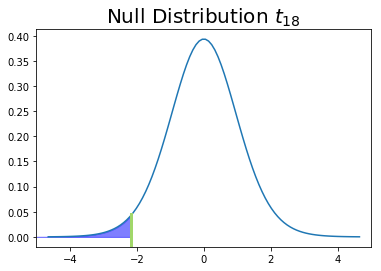

In [2]:
# wheat yield example
d = {'yA': [11.4,23.7,17.9,16.5,21.1,19.6],
     'yB': [26.9,26.6,25.3,28.5,14.2,24.3]}
df = pd.DataFrame(d)

x = df.values[:,0] # yA
y = df.values[:,1] # yB


tstat, pvalue = stats.ttest_ind(x,y)
print('The t-statistic is:', np.round(tstat,3), '\n', 'The P-value is:', np.round(pvalue/2,3))

trv = stats.t(df=18, loc=0, scale=1)
x = np.linspace(trv.ppf(0.0001), trv.ppf(0.9999), 100)
y = trv.pdf(x) 

plt.xlim(-5,5)
plt.plot(x,y)
plt.axvline(x = -2.18,ymax =0.15, color = '#a1d76a', linewidth = 3)
fill_section = np.arange(-5, -2.18, 1/20)
plt.fill_between(fill_section, trv.pdf(fill_section), color = 'blue', alpha = 0.5)
plt.title('Null Distribution ' r'$t_{18}$', fontsize=20);

# Statistical power

- Consider planning a randomized study where subjects are randomized into two groups.  

- It is desired to detect an effect size $d = (\mu_1-\mu_2)/\sigma = 0.5$ at the 5% significance level with 80% power.  How many subjects are required per group?

In [3]:
import statsmodels.stats.power as power

# Number of subjects per group for 80% power at the 5% significance level
power.tt_ind_solve_power(effect_size = 0.5, alpha = 0.05, 
                         power = 0.8, ratio = 1, alternative = 'two-sided')

63.76561177540974

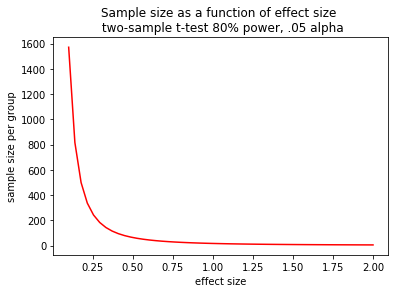

In [4]:
def plotpow(d):
    return(power.tt_ind_solve_power(effect_size = d, alpha = 0.05, 
                         power = 0.8, ratio = 1, alternative = 'two-sided'))

x = np.linspace(.1,2,50)
y = [plotpow(x) for x in x]
plt.plot(x, y, 'r-');
plt.xlabel('effect size');
plt.ylabel('sample size per group');
plt.title('Sample size as a function of effect size \n two-sample t-test 80% power, .05 alpha');

- $\alpha$
- $1-\beta$
- $n_1 $
- effect size 

In [5]:
import pandas as pd
webpage = 'https://www.canada.ca/en/public-health/services/surveillance/respiratory-virus-detections-canada/2018-2019/respiratory-virus-detections-isolations-week-01-ending-january-5-2019.html'

df = pd.read_html(webpage) # returns a list of tables 
df[1] # by inspection we see that Table 2 is the first table

 # select. rows corresponding to prov and territory
fludat = df[0].iloc[[0, 1, 2, 3, 11, 28, 29, 32, 33, 35, 36, 37, 38]]
url = 'https://en.wikipedia.org/wiki/List_of_regions_of_Canada#National_regions'
df = pd.read_html(url, header=0, attrs = {"class":"wikitable"})
Regions = df[0][['All provinces and territories', 'Six-region model[1]']]

Regions = (Regions
           # propogate non-null values forward
           .fillna(method = 'ffill', axis = 0) 
           # rename columns
           .rename(columns={"All provinces and territories": "prov", 
                            "Six-region model[1]": "region"})
           .replace(['Newfoundland and Labrador'], ['Newfoundland']))  

# Change province names so they match in both data sets

fludat = (fludat
          .replace('Province of', '', regex = True)
          .replace('Québec', 'Quebec', regex = True)
          .rename(columns={"Reporting Laboratory": "prov"}))

#Alberta, Ontario, Quebec, Sask have extra white space in their names so remove

fludat['prov'] = fludat['prov'].str.strip()

# Merge regions with flu data and only keep required columns

fludat1 = pd.merge(fludat, Regions, on = 'prov').iloc[0:,[0,1,2,3,4,5,23]]
fludat1['Flu Tested'] = fludat1['Flu Tested'].astype(float)

# create Proportion of Flu A Positive (defined as the ratio of 
# Total Flu A Positive to Flu Tested)

fludat1['propfluA'] = (fludat1
                       .apply(lambda x: float(x['Total Flu A Positive'])/x['Flu Tested'],axis=1))

fludat2 = fludat1[[list(fludat1)[0],list(fludat1)[1], list(fludat1)[5], list(fludat1)[6],list(fludat1)[7] ]]

# Comparing Influenza Rates 

Is the proportion of influenza A cases in New Brunswick and Quebec are 0.24 and 0.26 respectively.  Could the difference be due to chance?

In [6]:
fludat2

,prov,Flu Tested,Total Flu A Positive,region,propfluA
0,Newfoundland,171.0,34,Atlantic,0.198830
1,Prince Edward Island,46.0,17,Atlantic,0.369565
2,Nova Scotia,138.0,20,Atlantic,0.144928
3,New Brunswick,875.0,211,Atlantic,0.241143
4,Quebec,6253.0,1627,Quebec,0.260195
5,Ontario,2546.0,445,Ontario,0.174784
6,Manitoba,455.0,121,Prairies,0.265934
7,Saskatchewan,787.0,268,Prairies,0.340534
8,Alberta,1279.0,226,Prairies,0.176701
9,British Columbia,861.0,407,British Columbia,0.472706


Let $p_{NB},p_{Qu}$ be the true proportions in New Brunswick and Quebec. 

The null hypothesis is \_\_\_\_$P_{NB}=P_{QC}$\_\_\_\_

The alternative hypothesis is \_\_\_\_$P_{NB}\neq P_{QC}$\_\_\_\_

How can conduct a randomization test to compare the two proportions?

In [7]:
NB_cases = np.concatenate((np.repeat(1, 211), np.repeat(0, 875-211)))
Qu_cases = np.concatenate((np.repeat(1, 1627), np.repeat(0, 6253-1627)))
cases = np.concatenate((NB_cases, Qu_cases))
prov1 = np.concatenate((np.repeat('NB',875),np.repeat('Qu',6253)))

# sanity check (-:
NB_obs_p = sum(cases[prov1=='NB']==1)/875
Qu_obs_p = sum(cases[prov1=='Qu']==1)/6253
diff = NB_obs_p - Qu_obs_p

print('NB sample prop:',NB_obs_p, '\n', 
      'Qu sample prop:',Qu_obs_p, '\n',
      'Observed diff:', diff)

NB sample prop: 0.24114285714285713 
 Qu sample prop: 0.2601951063489525 
 Observed diff: -0.019052249206095356


The P-value is: 0.122


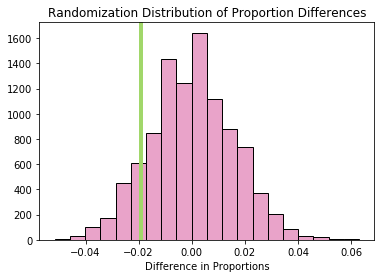

In [8]:
def prop_perm_test(data):
    np.random.shuffle(data) # randomly shuffle place
    prop_NB = data[prov1=='NB']
    prop_Qu = data[prov1 == 'Qu']
    return prop_NB.mean() - prop_Qu.mean()

N = 10000
null_dist = [prop_perm_test(cases) for x in range(N)] 

p_value = (sum(null_dist <= diff)+1)/(N+1)
print('The P-value is:', np.round(p_value,3))

plt.hist(null_dist,edgecolor = 'black', bins = 20, color = '#e9a3c9')
plt.xlabel('Difference in Proportions')
plt.title('Randomization Distribution of Proportion Differences');
plt.axvline(x = diff, color = '#a1d76a', linewidth = 4);

Is there statistical evidence that there is a significant difference in influenza rates? 

# Z-test for two proportions

$X_1 \sim Bin(n_1,p_1), X_2 \sim Bin(n_2,p_2)$.  Then the distributions can be approximated using the normal (why?):


$$X_1 \sim N(n_1p_1,n_1p_1(1-p_1)), X_2 \sim N(n_2p_2,n_2p_2(1-p_2)).$$

The normal approximation is accurate if $np, npq \ge 5$

This implies $\hat p_i = X_i/n_i,$,

$$\hat p_i \sim N(p_i,p_i(1-p_i)/n_i), i=1,2.$$

Therefore,

$$\hat p_1 - \hat p_2 \sim N(p_1-p_2,p_1(1-p_1)/n_1 + p_2(1-p_2)/n_2), i=1,2.$$

$$Z = ((\hat p_1 - \hat p_2) - (p_1-p_2))/\sqrt{p_1(1-p_1)/n_1 + p_2(1-p_2)/n_2} \sim N(0,1)$$


A test of $H_0: p_1=p_2$ versus $H_a:p_1 < p_2$ has P-value: $P(Z < Z^{obs})$, where $Z^{obs}$ is the observed value of $Z$.

NB: Compare these assumptions to to the permutation test

In [9]:
# z-test for two prop

from statsmodels.stats.proportion import proportions_ztest

nobs = np.array([875, 6253]) #n_1, n_2
count = np.array([211, 1627]) #X_1, X_2

obsZ, pval = proportions_ztest(count, nobs, alternative='smaller')
obsZ, np.round(pval,4)

(-1.2066400897238174, 0.1138)

Have a look at the source code for `proportions_ztest` by issuing `proportions_ztest??`

# Regional Influenza Distributions 

We see that 54% and 47% of the influenza A cases in Ontario and the British Columbia are H1N1. There are also other large differences.  Can these differences be explained by chance variation or do the data suggest that the proportion of H1N1 cases depends on the region of Canada? 

In [20]:
fludat_region1 = fludat1.iloc[:, [2,3,4,6]]
fludat_region1.iloc[:,:-1] = fludat_region1.iloc[:,:-1].astype(int)
# fludat_region1.groupby('region').sum()
fludat_region1

C:\Users\lihd1\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\lihd1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive,region
0,0,0,34,Atlantic
1,17,0,0,Atlantic
2,0,0,20,Atlantic
3,0,0,211,Atlantic
4,0,0,1627,Quebec
5,242,36,167,Ontario
6,13,0,108,Prairies
7,188,5,75,Prairies
8,178,5,43,Prairies
9,192,8,207,British Columbia


The table below is called a $6 \times 3$ contingency table.

In [21]:
fludat_region = fludat_region1.groupby('region').sum()
fludat_region

,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive
region,,,
Atlantic,17,0,265
British Columbia,192,8,207
Ontario,242,36,167
Prairies,379,10,226
Quebec,0,0,1627
Territories,17,1,2


- To test if the data suggest that the proportion of H1N1 cases depends on the region of Canada we need a statistic and reference distribution.

- If region and subtype are independent then we should expect 24.9% H1N1, 1.6% H3N2, and 73.4% UnS in Atlantic region, the same proportions as the whole sample.  The same is true for other regions.

- Let $N_{ij}$ be the number of people in row $i$ column $j$, $R_j$ and $C_j$ be the row and column totals, and $N$ the overall total.  The expected count for any cell is:

$$E_{ij} = \frac{R_iC_j}{N}.$$

In [22]:
H1N1_Tot = fludat_region['A(H1N1)pdm09 Positive'].sum(axis=0) #C_1
H3N2_Tot = fludat_region['A(H3) Positive'].sum(axis=0) #C_2
UNS_Tot = fludat_region['A(UnS) Positive'].sum(axis=0) #C_3
N = float(H1N1_Tot + H3N2_Tot + UNS_Tot)

print('H1N1: (Total);',H1N1_Tot,'(Prop)',np.round(float(H1N1_Tot)/N,3) ,'\n',
      'H3N2: (Total)',H3N2_Tot, '(Prop)',np.round(float(H3N2_Tot)/N,3) , '\n',
      'UnS: (Total)',UNS_Tot, '(Prop)',np.round(float(UNS_Tot)/N,3))


H1N1: (Total); 847 (Prop) 0.249 
 H3N2: (Total) 55 (Prop) 0.016 
 UnS: (Total) 2494 (Prop) 0.734


In [24]:
from scipy.stats.contingency import expected_freq

np.rint(expected_freq(fludat_region.iloc[:,[0,1,2]]))

array([[  70.,    5.,  207.],
       [ 102.,    7.,  299.],
       [ 111.,    7.,  327.],
       [ 153.,   10.,  452.],
       [ 406.,   26., 1195.],
       [   5.,    0.,   15.]])

A statistic that measures the difference between observed and expected cell counts while accounting for the expected size of the cell is:

$$C = \sum_{\text{all cells}}\frac{(\text{observed - expected})^2}{\text{expected}} $$

$C$ is known as the Chi-Square test statistic.

In [25]:
# the summand for each cell
sum_i = (pow((np.array(fludat_region.iloc[:,[0,1,2]]) - expected_freq(fludat_region.iloc[:,[0,1,2]])),2)/
         expected_freq(fludat_region.iloc[:,[0,1,2]]))
#sum over cells
obs_chisq = np.sum(sum_i)
obs_chisq

1592.5568918283873

Now we need a reference distribution to compare the observed value.

$$H_0: \text{region and and subtype of influenza are independent,} \\ H_a: \text{region and subtype of influenza are dependent}.$$

- If $H_0$ is true then we could permute region (or influenza subtype) values, and any other permutation would be equally as likely. 

- For each permutation resample we can cross-tabulate to obtain a table of observed values and compute the chi-square statistic for the resample.

- <mark> Exercise: write a program to calculate the permutation distribution for test of independence </mark>

In [26]:
//%run indep_perm.py

ERROR:root:File `'indep_perm.py'` not found.


In [27]:
plt.hist(permdist,edgecolor = 'black', bins = 20, color = '#e9a3c9')
plt.xlabel('Chi-square Statistic')
plt.title('Permutation Distribution of Region and Influenza Test of Independence');
print('The observed value of the chi-square statistic is', np.round(obs_chisq))

NameError: name 'permdist' is not defined

# The parametric chi-square test

- Karl Pearson proposed the chi-square statistic in the 1920s.
- The permutation test approach was not easy to implement on large data sets.
- Pearson and R.A. Fisher developed a shortcut - if the expected counts are reasonably large then the null distribution is _approximately_ chi-square with $(I-1)(J-1)$ degrees of freedom, where $I$ and $J$ are the numbers of rows and columns.
- The pdf of the chi-square distribution on $m$ degrees of freedom is:  $$f(x)=\frac{x^{m/2-1} e^{-x/2}}{2^{m/2}\Gamma(m/2)}, x>0. $$

- A random variable $X$ that follows a Chi-square distribution is often denoted as $ X \sim \chi^2_m$

- The influenza example has a null distribution with $(6-1)(3-1)=10$ degrees of freedom.
- `chi2` in [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) has methods available for calculations involving the $\chi^2_m$.

NameError: name 'permdist' is not defined

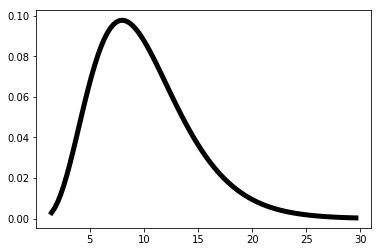

In [28]:
from scipy.stats import chi2

df = 10
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 100)
plt.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=2.0, label= r'$\chi^2_{10}$ density', color = 'black')
plt.hist(permdist,edgecolor = 'black', bins = 20, color = '#7fbf7b', density = True);
plt.title('Null Distribution of Permutation Test for' '\n' 'Independence of Region and Influenza Test')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend();

The permutation p-value is: $$\text{p-value} = \frac{\#\{\chi^2_{sim_i} > \text{obs_chisq}\}}{N},$$

where $N$ is the number of simulations, $\chi^2_{sim_i}$ is the value of the chi-square statistic in the $i^{th}$ simulation $i=1,\ldots,N$, and $\text{obs_chisq}$ is the observed value of the chi-square statistic.

The chi-square test p-value is:

$$ \text{p-value} = P(X> \text{obs_chisq}) = \int_{0}^{\text{obs_chisq}}\frac{x^{m/2-1} e^{-x/2}}{2^{m/2}\Gamma(m/2)}dx $$

The observed chi-square statistic, p-value, degrees of freedom, expected counts can be calculated using `chi2_contingency` in the `scipy.stats` library. 

In [30]:
from scipy.stats import chi2_contingency

chisq, p, df, expect = chi2_contingency(fludat_region.iloc[:,[0,1,2]])
print(' The observed chi-square statistic is:', np.round(chisq,2), '\n',
      'The p-value is:', np.round(p,2), '\n',
      'The expected counts are: \n', np.rint(expect))

 The observed chi-square statistic is: 1592.56 
 The p-value is: 0.0 
 The expected counts are: 
 [[  70.    5.  207.]
 [ 102.    7.  299.]
 [ 111.    7.  327.]
 [ 153.   10.  452.]
 [ 406.   26. 1195.]
 [   5.    0.   15.]]


- Permutation tests are based on the idea of hypothetically repeating the study many times.
- We imagine hypothetical data sets generated by the same mechanism as the observed data.
- The accuracy of the observed value of the parameter is based on the accuracy of the ensemble of parameters in the hypothetical repetitions.

# Bayesian Inference

## Example

### Prior

- Human males have both an X and Y chromosome and females have two X chromosomes.  Each chromosome is inherited from one parent.

- Hemophilia is a disease where a male who inherits the gene that causes the disease on the X-chromosome is affected whereas a female carrying the gene on only one of her two X-chromosomes is not affected. 

- Consider a woman who has an affected brother and unaffected father.  This implies her mother must be a carrier of the hemophilia gene. Thus, the woman has a fifty-fifty chance of having the gene.

- Let $\theta=1$ if the woman is a carrier and $\theta=0$ if the woman is not a carrier. 

- The prior distribution is: $P(\theta=1)=P(\theta=0)=1/2$.

### Model and likelihood

- The data used to update are the affected status of the woman's sons (they are not identical twins).
- Let $y_i=1$ or $0$ if the son is affected or not respectively.
- The outcomes of the two sons are exchangeable and, conditional on $\theta$ independent.   

$$\begin{align*}
P(y_1=0,y_2=0|\theta=1)&=(0.5)(0.5)=0.25 \\
  P(y_1=0,y_2=0|\theta=0)&=(1)(1)=1.
  \end{align*}$$


## Posterior

Let ${\bf y} = (y_1,y_2)$

$$ \begin{align*}
P(\theta=1|{\bf y}) &= \frac{P({\bf y}|\theta=1) P(\theta=1)}{P({\bf y}|\theta=1) P(\theta=1)+P({\bf y}|\theta=0) P(\theta=0)} \\
                    &= \frac{(0.25)(0.5)}{(0.25)(0.5) + (1.0)(0.5)}=0.20.
\end{align*}$$

Interpretation:  If a woman has unaffected children, it is less probable that she is a carrier.  The prior odds that the woman is affected is $0.5/0.5 = 1$.  The likelihood ratio based on the two unaffected sons is $0.25/1=0.25$.  So, the posterior odds are $1 \times 0.25=0.25.$ 

- A key aspect of Bayesian analysis is the ease with which sequential analysis can be performed.
- Suppose that a woman has a third son, who is also unaffected. The previous posterior distribution can be used as the new prior distribution (<mark> Exercise: show this is true </mark>, to obtain:


Let ${\bf y} = (y_1,y_2,y_3)$

$$ \begin{align*}
P(\theta=1|{\bf y}) &= \frac{P({\bf y}|\theta=1) P(\theta=1)}{P({\bf y}|\theta=1) P(\theta=1)+P({\bf y}|\theta=0) P(\theta=0)} \\
                    &= \frac{(0.50)(0.20)}{(0.5)(0.20) + (1.0)(0.8)}=0.111.
\end{align*}$$

<mark> Exercise: </mark> Alternatively, if the third son is affected then the posterior probability of the woman being a carrier is 1. 

# Bayesian Inference 

- Bayesian statistical conclusions about a parameter $\theta$, or unobserved data $\tilde y$, are made in terms of probability statements.
- Probability statements are conditional on observed value of $y$. $p(\theta|y), p({\tilde y}|y).$
- Conditioning on the observed data instead of retrospective evaluation of the procedure to estimate $\theta$ over the distribution of possible $y$ values conditional on the true unknown value of $\theta$ defines Bayesian inference.

# Bayes' rule

To make probability statements about $\theta$ given $y$ we need: 

- a sampling distribution $p(y|\theta)$ - either a probability mass function or density function.

- a prior distribution for $p(\theta)$

$$\begin{align*}
p(\theta,y) &= p(\theta)p(y|\theta) \\
\Rightarrow p(\theta|y)&= \frac{p(\theta,y)}{p(y)} \\
                       &= \frac{p(\theta)p(y|\theta)}{p(y)}.
\end{align*}$$


# Estimating the probability of a female birth

- In a binomial model the aim is to estimate an unknown population proportion from the results of a sequence of 'Bernoulli' trials.
- Data $y_1,\ldots, y_n$ each of which is either 0 or 1.
- The binomial sampling model states that: $p(y|\theta)= {n \choose y}\theta^y(1-\theta)^{n-y}$.
- The left hand side doesn't depend on $n$ because it's regarded as part of the design and considered fixed.

- 200 years ago it was established that the proportion of female births in European populations was less than 0.5.  The currently accepted value is 0.485.
- Let $y$ be the number of girls recorded in $n$ births.
- Applying the binomial model we are assuming that the $n$ births are conditionally independent given $\theta$, with the probability of a female birth equal to $\theta$ for all cases. 
- To perform Bayesian analysis in the binomial model we need to specify a prior distribution for $\theta$.
- Assume that the prior is uniform on $[0,1].$

Bayes' rule can be used to derive the posterior distribution of $\theta$:

$$p(\theta|y) \propto \theta^y(1-\theta)^{n-y}.$$

The constant of proportionality is obtained by integration:

$$\int_{0}^{1}\theta^y(1-\theta)^{n-y}d\theta.$$

Therefore, the posterior distribution is: $$\theta|y \sim Beta(y+1,n-y+1) $$

$$p(\theta \mid y) = \frac{\theta^Y(1-\theta^{n-y})}{\int_0^1 \theta^y (1-\theta)^{n-y}d\theta}$$

Since $\int_0^1 \Gamma(a+b)/\Gamma(a)\Gamma(b)\theta^{a-1} (1-\theta)^{b-1}d\theta = 1$, we can flip the Gamma functions and the formula above $\sim Beta$

In [ ]:
from scipy.stats import beta

def params(y,n):
    return(y+1, n-y+1)

plt.figure(num=None, figsize=(8, 9))

ax1 = plt.subplot(221)
a = params(3,5)[0]
b = params(3,5)[1]
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='n=5 \n y=3')
plt.legend(loc='upper right')
plt.title('Posterior for Binomal - uniform prior');

plt.subplot(222, sharex=ax1)
a = params(12,20)[0]
b = params(12,20)[1]
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='n=12 \n y=20')
plt.legend(loc='upper right')
plt.title('Posterior for Binomal - uniform prior');

plt.subplot(223, sharex=ax1)
a = params(60,100)[0]
b = params(60,100)[1]
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='n=60 \n y=100')
plt.legend(loc='upper right')
plt.title('Posterior for Binomal - uniform prior');

plt.subplot(224, sharex=ax1)
a = params(600,1000)[0]
b = params(600,1000)[1]
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='n=600 \n y=1000')
plt.legend(loc='upper right')
plt.title('Posterior for Binomal - uniform prior');

- Laplace used the uniform prior in analyzing the binomial model.
- His first serious application was to estimate the proportion of female births in a population.
- A total of 241,945 girls and 251,527 boys were born in Paris from 1745 to 1770.
- Laplace calculated:

$$ P(\theta \ge 0.5 | y = 241,945, n = 241,945 + 251,527).$$

In [33]:
import scipy as sp
1- sp.stats.beta.cdf(x = 0.5, a = 241945+1, b = 241945+251527-241945+1)

1.1102230246251565e-16

## Posterior predictive distribution 

Let $\tilde y$ denote the result of a new trial and $y$ the result of a previous trial.

$$\begin{align*}
P({\tilde y}=1|y) &= \int_0^1 P({\tilde y}=1|\theta, y)p(\theta|y)d\theta \\
                  &= \int_0^1 \theta p(\theta|y)d\theta \\
                  &= E(\theta|y) = \frac{y+1}{n+2}.
\end{align*}$$ 

# Summarizing Posterior Inference

- Commonly used summaries of location are mean, median, and mode(s), and summaries of variation include sd, IQR, and other quartiles.
- Posterior intervals can be used to summarize uncertainty similar to confidence intervals.


## Example: estinating the probability of a female birth given placenta previa

- The maternal condition placenta previa is an unusual condition of pregnancy where the placenta is implanted very low in the uterus, obstructing the fetus from normal vaginal delivery.

- An early study concerning sex of plancenta previa in Germany found that of a total of 980 births, 437 were female.

- How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa births is less than 0.485 - the proportion of female births in the population?


- Assuming a uniform prior for the probability of female birth, the posterior is $Beta(437+1,980-437+1)=Beta(438,544)$.
- In many situations it's not feasible to perform calculations on the posterior density function directly. 
- Simulation can be used to obtain inferences from the posterior.

95% posterior interval:[ 0.415 , 0.477 ]
mean: 0.4460278839763256 
 median: 0.44599249122930806 
 sd: 0.015859751226968477 
 iqr: 0.02140356169001001


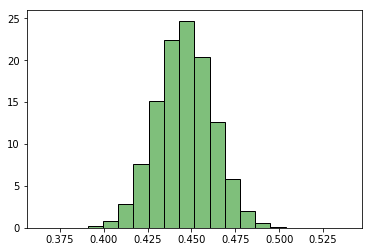

In [40]:
# 1000 draws from the posterior dist.
post_dist = sp.stats.beta.rvs(438,544,size=10000000)
plt.hist(post_dist,edgecolor = 'black', bins = 20, color = '#7fbf7b', density = True);
print('95% posterior interval:[',np.round(np.quantile(post_dist, q = 0.05/2),3), ',',np.round(np.quantile(post_dist, q = 1-0.05/2),3),']')
print('mean:', np.mean(post_dist), '\n','median:', np.median(post_dist),'\n','sd:', np.std(post_dist), '\n','iqr:', stats.iqr(post_dist))

Is there evidence that the proportion of female births in the population of placenta previa births is less than 0.485?